In [156]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [157]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [256]:
def diamond(k):
    for i in range(k-1):
        print( " " * (k-i) + '*' * (2*i+1) )
        
    for j in range(k-1,-1,-1):
        print(" " * (k-j) + '*' * (2*j+1) )          

            

In [257]:
diamond(10)

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************
 *******************
  *****************
   ***************
    *************
     ***********
      *********
       *******
        *****
         ***
          *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [239]:
with open ('symbols01.txt','r') as f:
    symbols_01 = f.read()
    symbols_01=symbols_01.strip().split("\n")
    set_01=set(symbols_01)
    
with open ('symbols02.txt','r') as f:
    symbols_02 = f.read()
    symbols_02 = symbols_02.strip().split("\n")
    
list_01 = list(symbols_01)
list_02 = list(symbols_02)

set_03 = set(list_01 + list_02)


In [246]:
with open('symbols03.txt','w') as w:
    for symbol in set_03:
        w.write(symbol.strip().upper() + "\n")    

In [249]:
with open ('symbols03.txt','r') as f:
    symbols_03 = f.read()
    print(symbols_03)

TESS
FENC
ALJJ
PCO
TRPX
FYC
KTEC
CELC
ERYP
GEMP
CDXC
WYIG
AVDL
LIND
FCCO
GWRS
OVBC
USAK
AGFS
OVLY
CALL
TA
CRBP
FAD
RUN
FTGC
EML
ATTU
CALA
CCXI
LFVN
GPAC
RELL
EBMT
NLNK
CFMS
HMNY
OSPR
LTRPA
CMFN
MRAM
FOMX
RCKY
VIAV
SGBX
ICLN
KMDA
KALV
CMSS
MBFIP
DLHC
GIFI
BEBE
GLBL
OMED
PEBK
IOVA
HAIR
CHW
DEPO
RDNT
ALLT
FCCY
TCRD
OBSV
FOSL
HALL
WHLR
OCUL
CBMG
MTEM
IOTS
VOXX
GLMD
ITI
SGRY
KCAP
SYBX
PYZ
TRIB
REDU
CYCCP
PMBC
SND
NESR
LACQU
LARK
ASYS
PFSW
AIRG
DHXM
PRGX
PFIN
NWFL
III
ADMA
UFPT
GAIA
VUZI
CLUB
ROBO
OBAS
LWAY
BGFV
CNACU
BRQS
IFMK
REPH
SEAC
ZN
SSRM
TELL
FNWB
AMD
NXEOU
TTOO
MITK
HLG
ELON
EMKR
AUTO
IIN
CLFD
HNRG
FTD
FBIO
ASV
GWGH
FNY
MIII
CEMI
SPWH
PBIP
SSC
PROV
BKCC
LAKE
GSIT
CLMT
BKEPP
IEUS
AXON
APOP
PGNX
SPIL
VIRC
INFI
RIOT
CLNT
SCWX
HRZN
ESGE
RFEU
ADMP
AXTI
GARS
AKTS
NERV
DAVE
CKPT
CYRX
AXSM
CELH
FSAC
KIN
TGLS
DAKT
RBCN
NDLS
CAMT
ESXB
QTRH
DRNA
HWCC
JASO
PIH
IMTE
OPK
UBFO
CDOR
ARCT
KBLM
QUIK
NYMT
TCFC
BOXL
IDLB
RARX
FDBC
MRBK
SIFI
DWFI
FAT
GILT
XONE
CECE
YTRA
ADAP
QQXT
CGEN
VRIG
JYNT
SBCP
BCO

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [242]:
from io import StringIO
import pandas as pd

In [243]:
r = requests.get(" http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [244]:
r.encoding = 'Big5'
companies = pd.read_csv(StringIO(r.text), skiprows=1)
companies.head()

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [167]:
df = data['GOOG']

In [168]:
# 計算12日移動平均線及26日移動平均線

df['EMA_12d'] = pd.Series.ewm(df['Close'], span=12, min_periods=1).mean()
df['EMA_26d'] = pd.Series.ewm(df['Close'], span=26, min_periods=1 ).mean()

In [169]:
#DIF為12日移動平均減掉26日移動平均
df['DIF'] =  df['EMA_12d'] - df['EMA_26d']

In [170]:
#MACD線:用DIF再取一次移動平均(通常用9日)
df['MACD'] =  pd.Series.ewm(df['DIF'], span=9 ,min_periods=1 ).mean()

In [171]:
#柱線 = 快線(DIF) - 慢線(MACD)
df['MACD_Histogram'] = df['DIF']-df['MACD']

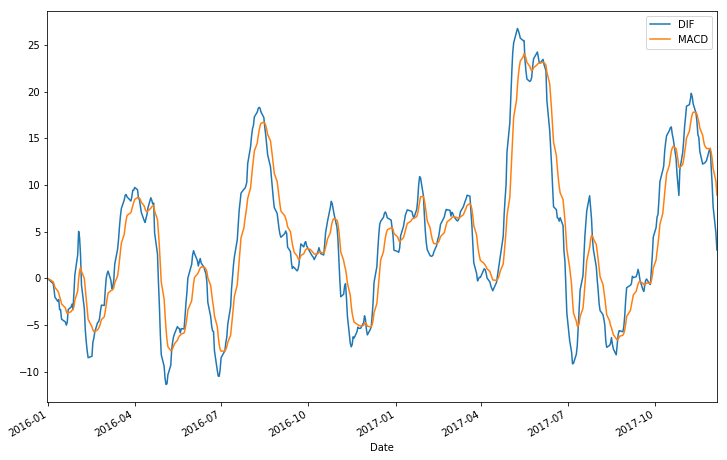

In [172]:
#畫出快線(DIF)及慢線(MACD),當快線(DIF)向上突破慢線(MACD)→買進訊號;當快線(DIF)向下跌破慢線(MACD)→賣出訊號

df[['DIF','MACD']].plot(legend='best', figsize=(12,8))

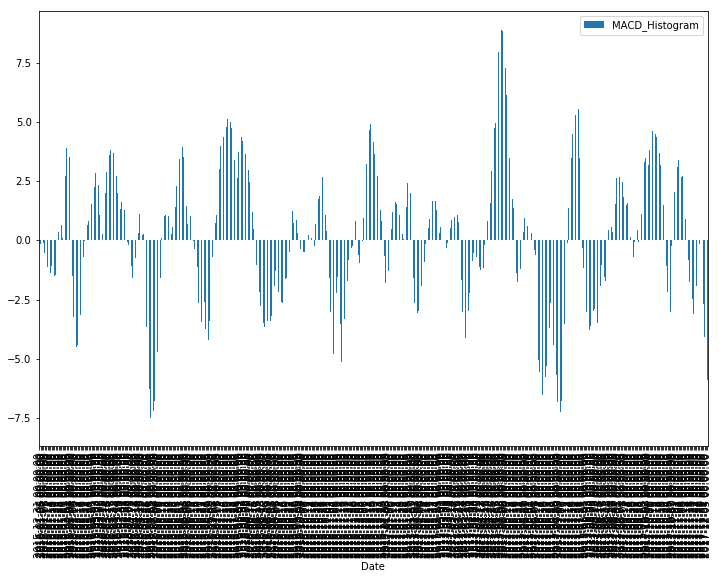

In [173]:
df[['MACD_Histogram']].plot(legend='best', figsize=(12,8), kind = 'bar' )

# Q5. 策略回測

In [174]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [175]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [176]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [177]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [178]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [179]:
# 定義你的策略
#MACD指標進場條件：當 MACD及DIF皆大於0(多頭訊號)，且DIF向上突破MACD即為進場點 ;當 MACD及DIF皆小於0(空頭訊號)，且DIF向下突破MACD即為出場點。 

def m064030033_strategy(df):
    has_position = False
    df['signals'] = 0
    
    df['EMA_12d'] = pd.Series.ewm(df['Close'], span=12, min_periods=1).mean()
    df['EMA_26d'] = pd.Series.ewm(df['Close'], span=26, min_periods=1 ).mean()
    df['DIF'] =  df['EMA_12d'] - df['EMA_26d']
    df['MACD'] =  pd.Series.ewm(df['DIF'], span=9 , min_periods=1 ).mean()

    
    for t in range(2, df['signals'].size):
        if df['MACD'][t] < df['DIF'][t] and df['MACD'][t-1] > df['DIF'][t-1] and df['MACD'][t] >0 and df['DIF'][t]>0 :
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['MACD'][t] > df['DIF'][t] and df['MACD'][t-1] < df['DIF'][t-1] and df['MACD'][t] <0 and df['DIF'][t]<0:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
                
                
    df['positions'] = df['signals'].cumsum().shift()
    return df

In [180]:
def apply_strategy(strategy, df):
    return strategy(df)

In [181]:
# 計算各支股票的回測結果
results = []

strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, m064030033_strategy]
#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [182]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [183]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,-0.005123,-0.325785,281,0.957619,705,3,TICC,m064030033_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [184]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
66,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [185]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
27,2.397336,-0.157591,89,2.983705,705,2,RICK,m064030033_strategy
79,1.262306,-0.493953,223,2.714353,705,1,BBGI,m064030033_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
78,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
